# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.shape

(440, 6)

In [3]:
df = data

In [ ]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [ ]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,2,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


In [7]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
It will help in setting customers to categories identifing customer needs and places where the customer mostly exist.
By taking the first three customers as an example we will find that customer "0" is more likley exist in Markets
Customer "1": Cafe
Customer "2": Cafe - Delis

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.model_selection.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score

In [ ]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
x = new_data.drop(columns=['Grocery'])
y = new_data['Grocery']
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test,y_pred)
print("R2 Score:",score)

'''
R2 Score[Fresh Target]: negative number = -0.3748 
R2 Score[Milk]: Postive number = 0.154 
R2 Score[Grocery]: Postive number = 0.6971 
R2 Score[Frozen]: Negative number = -0.2612
R2 Score[Detergents_Paper]: Postive number = 0.3409
R2 Score[Delicatessen]: Negative number = -2.9555
'''

R2 Score: 0.6917829671198117


'\nR2 Score[Fresh Target]: negative number = -0.3748 \nR2 Score[Milk]: Postive number = 0.154 \nR2 Score[Grocery]: Postive number = 0.6971 \nR2 Score[Frozen]: Negative number = -0.2612\nR2 Score[Detergents_Paper]: Postive number = 0.3409\nR2 Score[Delicatessen]: Negative number = -2.9555\n'

### Question 2

* Which feature did you attempt to predict?                                                     
--All Feautres tested to be the target                                                  
* What was the reported prediction score?                                                         
The R2_Score ["Prediction_Score"] is:                                                             
.R2 Score[Fresh Target]: negative number = -0.3748                                              
.R2 Score[Milk]: Postive number = 0.154                                                     
.R2 Score[Grocery]: Postive number = 0.6971                                                     
.R2 Score[Frozen]: Negative number = -0.2612                                                      
.R2 Score[Detergents_Paper]: Postive number = 0.3409                                              
.R2 Score[Delicatessen]: Negative number = -2.9555                                              
(each bracket contains the feature set to be the target)                                          
* Is this feature necessary for identifying customers' spending habits?                           
The most important feautre is "Grocery" as it achived the highest score.                          

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

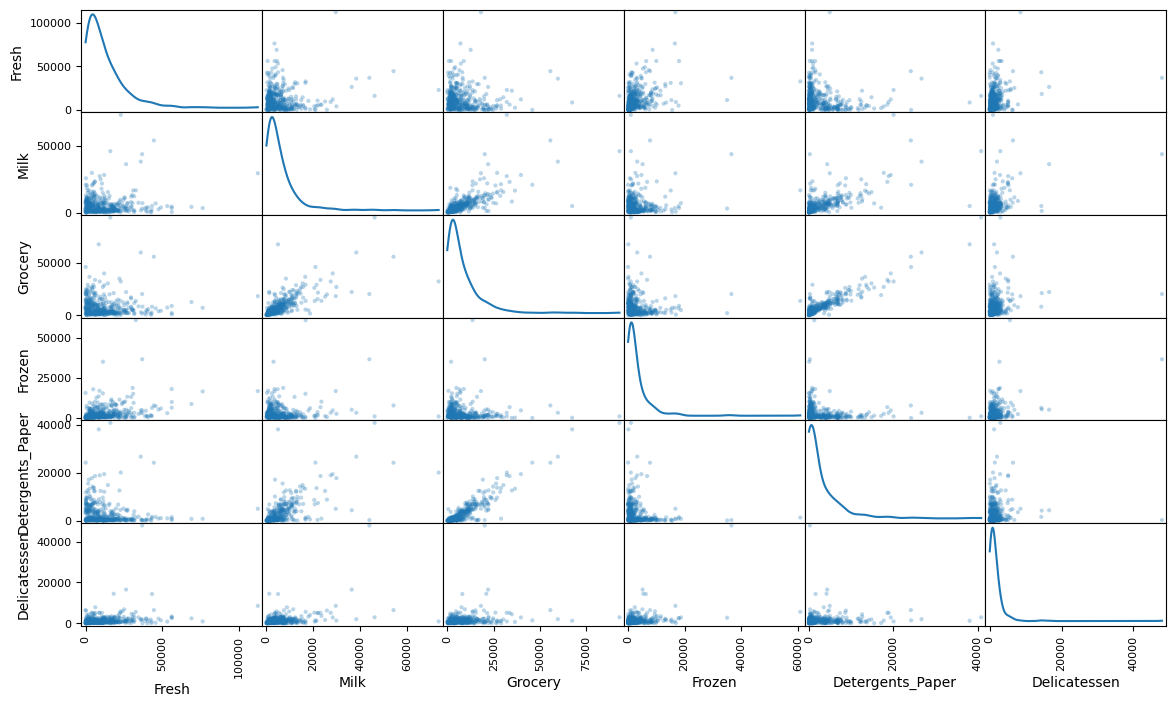

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [11]:
data_col = data.corr()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

** There is strong direct corellation between Grocery and Milk, Grocery and Detergants, Milk and Detergents
** There is semi-direct corellation between Delicatessen and Milk.
**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

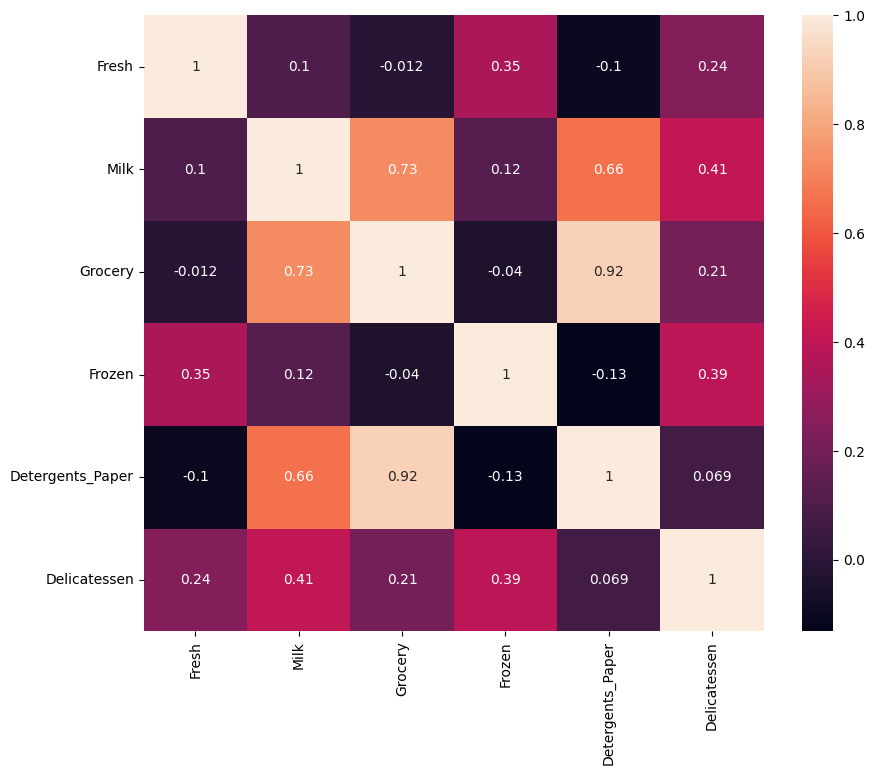

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data_col,annot=True) #Heatmap is a visuallization tool where the data previewed
                                #is not the real data it's the colleartion between them

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [14]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Box Cox Test Very Important

In [15]:
import pandas as pd
from scipy.stats import boxcox
# Ensure all columns are positive (if needed)
# Shift data by adding a constant if non-positive values exist
if (data <= 0).any().any():
    shift_constant = abs(data.min().min()) + 1
    data += shift_constant

# Apply Box-Cox transformation to each column
transformed_data = pd.DataFrame()
lambda_values = {}

for col in data.columns:
    transformed_data[col], lambda_value = boxcox(data[col])
    lambda_values[col] = lambda_value

# Print transformed data and lambda values
print("Transformed Data:")
print(transformed_data)
print("\nOptimal Lambda Values:")
print(lambda_values)


Transformed Data:
         Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
0    51.736929  12.670296  16.694344   6.887990         10.154314   
1    42.989039  12.699554  17.444171  10.638490         10.494584   
2    41.571836  12.500944  16.745022  11.254315         10.602565   
3    52.490395   9.068055  14.932093  13.308825          7.587652   
4    62.025094  11.620138  16.540473  12.253988          9.499037   
..         ...        ...        ...        ...               ...   
435  67.509500  13.082825  19.168374  14.934482          6.131939   
436  73.578839   9.358068  10.462169  12.552512          5.226444   
437  54.015028  13.557445  21.453265   8.079721         13.088843   
438  48.453012   9.892812  13.150499   9.629617          6.022019   
439  31.861358   9.637905  13.467891   5.061013          7.498397   

     Delicatessen  
0       15.470233  
1       16.620941  
2       23.790244  
3       16.649069  
4       21.583732  
..            ...  
435     17.54

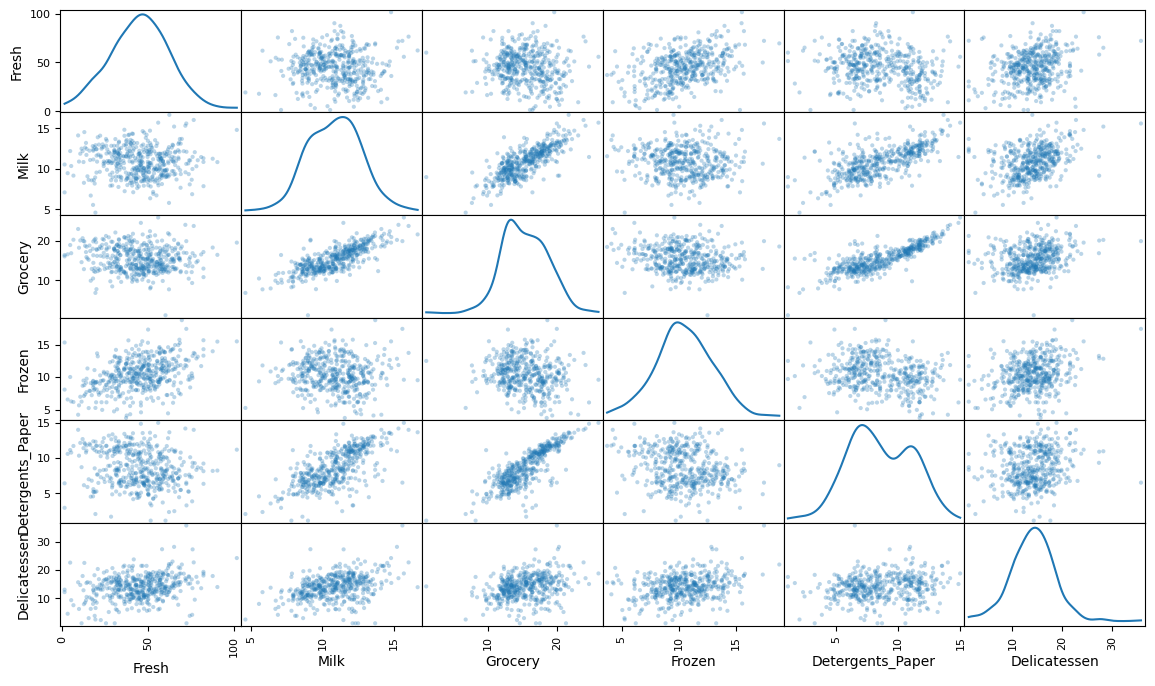

In [16]:
# TODO: Scale the data using the natural logarithm
log_data = transformed_data.copy()
# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(log_data)
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3.946172,2.539260,2.815070,1.929779,2.317899,2.738918
1,3.760945,2.541567,2.859006,2.364479,2.350859,2.810663
2,3.727423,2.525804,2.818101,2.420752,2.361096,3.169276
3,3.960630,2.204758,2.703513,2.588427,2.026522,2.812354
4,4.127539,2.452740,2.805810,2.505851,2.251190,3.071940
...,...,...,...,...,...,...
435,4.212268,2.571300,2.953262,2.703673,1.813511,2.864544
436,4.298357,2.236239,2.347766,2.529921,1.653731,2.880001
437,3.989262,2.606936,3.065877,2.089357,2.571760,2.823194
438,3.880594,2.291808,2.576460,2.264843,1.795423,2.855482


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
Q1 = log_data.quantile(0.25)
print(Q1)

Fresh               33.082662
Milk                 9.470307
Grocery             13.054013
Frozen               9.014500
Detergents_Paper     6.610681
Delicatessen        11.270068
Name: 0.25, dtype: float64


In [19]:
log_data.mean()

Fresh               44.845750
Milk                10.856013
Grocery             15.434101
Frozen              10.443894
Detergents_Paper     8.555818
Delicatessen        14.007201
dtype: float64

In [20]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(IQR)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [181,154,65,183,128,233,23,71,87,109,128,142]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#Fresh - Milk[154] - Frozen[65 - 183] - Delicatessen[128-233-154-23-183-184-71-87-109-128-142]

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,101.573168,14.821916,19.601094,15.50805,11.172697,24.271948


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,62.288622,16.688055,21.679027,9.536029,13.638423,13.972231
154,19.248393,4.596233,6.853242,5.270266,2.066981,2.552898


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,60.062055,8.986897,1.179625,12.503507,1.136529,14.255726
85,55.798208,15.720154,25.969333,9.607979,14.972315,18.835822


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,37.459458,13.586913,19.312697,4.105383,11.753132,11.456670
57,39.504702,12.722615,17.742451,4.299517,11.899624,15.301847
65,9.188743,14.140340,23.052622,4.224827,13.986677,15.715235
93,49.925909,10.642868,12.938975,17.328536,4.872810,18.437994
145,61.528604,12.410477,21.982980,4.438733,12.793740,20.789661
183,72.168679,15.617996,19.974334,17.437505,6.510175,35.778586
325,69.562149,13.711143,18.613585,18.774933,8.975022,21.989378
420,37.101016,11.572220,18.513235,3.730425,11.718648,15.630150


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,65.063140,15.236171,20.288093,12.837631,10.951341,28.228417
71,58.051674,9.159633,20.125298,12.927220,10.886939,27.391987
87,75.837775,11.489218,16.917972,13.277140,9.312650,27.339710
109,25.412566,13.704849,21.294649,8.838333,8.332239,1.222366
128,11.185312,12.509060,14.645550,6.237033,8.696657,1.222366
142,72.282923,12.121061,16.970633,11.699033,3.289073,1.222366
154,19.248393,4.596233,6.853242,5.270266,2.066981,2.552898
183,72.168679,15.617996,19.974334,17.437505,6.510175,35.778586
184,15.333830,8.646688,15.253509,5.250524,6.983535,3.041318
187,30.495868,12.325238,17.528036,13.262186,10.575590,1.222366


## As outlier removed the variance is maximized

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
*** The Data points removed as thier are a huge bias between the data and data mean where it will effect the K-means clustering
* Should these data points be removed from the dataset?                                           
*** Yes, as it will affect the K-Mean Clustering
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

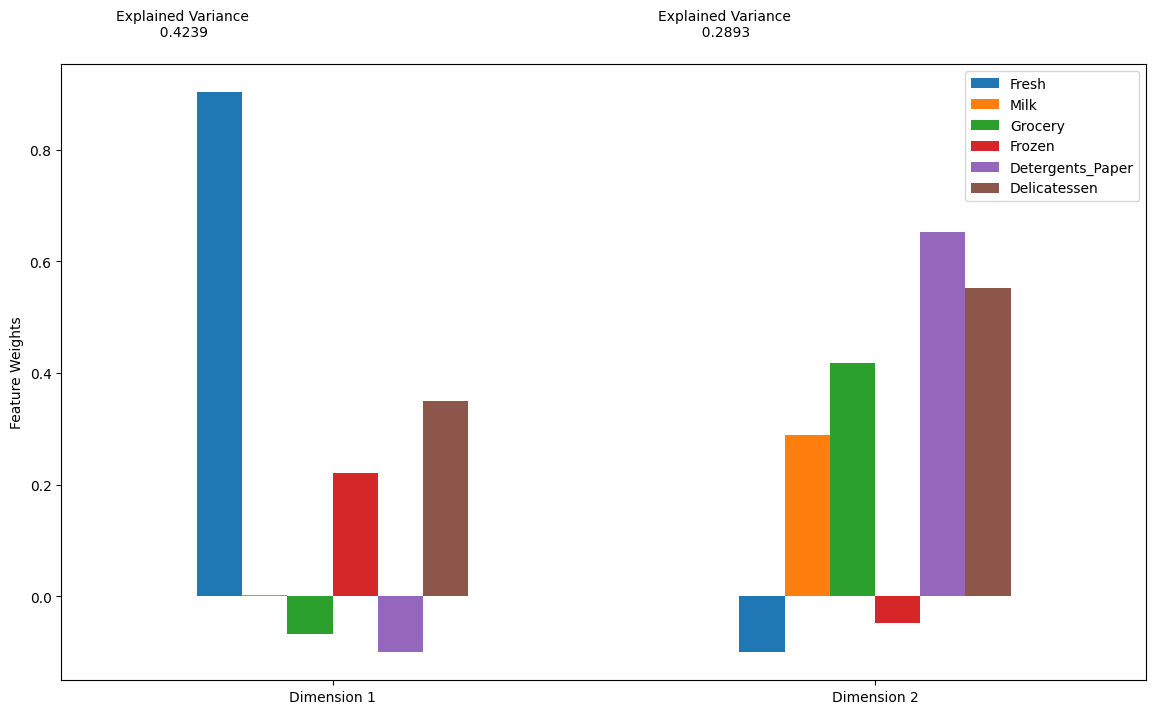

In [21]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
''' 
The PCA is known as "The Principal Component Analysis
It is used to reduce dimentionality of dataset while
preserving the most important patterns or relationships between the variables
"'''
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(log_samples)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convert to percentage
cumulative_variance = explained_variance_ratio.cumsum() 
explained_variance = pca.explained_variance_
total_variance = explained_variance.sum()
# Step 4: Display results
print("Variance Percentage per Component:", explained_variance_ratio)
print("Cumulative Variance Percentage:", cumulative_variance)
print("Total Variance:", total_variance)


Variance Percentage per Component: [42.38688882 28.93470451]
Cumulative Variance Percentage: [42.38688882 71.32159332]
Total Variance: 0.5141255088961785


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
  - The first PCA (D1) has greater variance than the second PCA (D2) 
* How much variance in the data is explained by the first four principal components?              
  - Variance = 42.386'
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2
0,0.1616,0.3246
1,0.1091,0.4025
2,0.2182,0.5863
3,0.3818,-0.0005
4,0.5759,0.3910
...,...,...
435,0.6577,0.0689
436,0.7586,-0.3765
437,0.2229,0.6491
438,0.2850,-0.1321


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

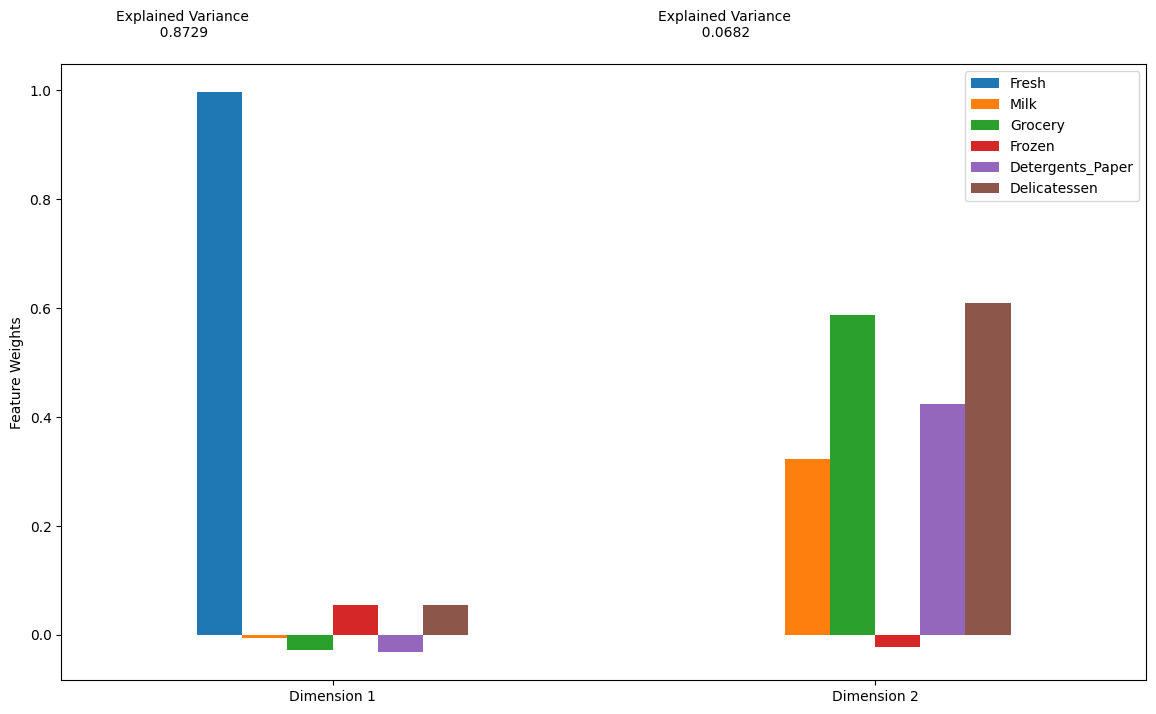

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data =pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# TODO: Transform log_samples using the PCA fit above
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-41.1269,-19.3466
1,-41.2856,-19.2724
2,-41.2953,-19.0800
3,-41.0572,-19.6138
4,-40.8930,-19.2185
...,...,...
435,-40.7999,-19.4098
436,-40.6986,-19.9277
437,-41.0862,-19.0223
438,-41.1421,-19.7244


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

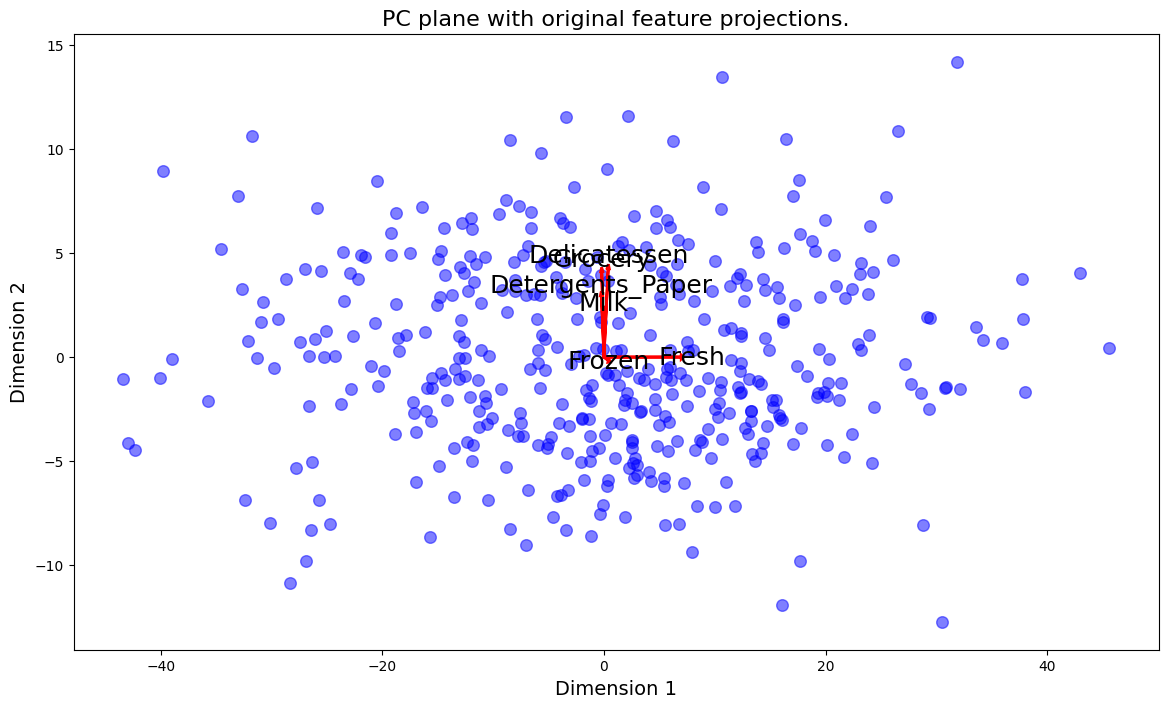

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?
 - Yes and the grocery is the most collerated with the other features

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

The Silhouette Score measures how similar each point is to its own cluster compared to other clusters. It ranges from -1 to 1, where:

1: Data points are perfectly matched to their cluster.

0: Points are on or near cluster boundaries.

-1: Points are assigned to the wrong cluster.



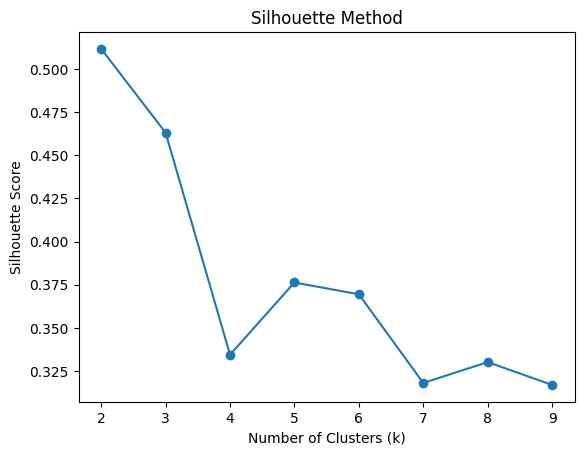

In [28]:
silhouette_scores = []

for k in range(2, 10):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2,random_state=42)
#clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
clusters = clusterer.fit_predict(reduced_data)
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers_pca = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = np.mean(silhouette_scores)

d:\AMIT\Amit\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** I tried the silhouette method to determine the best number of clustering and as "2" has the highest silhouette score i implemented it as a parameter value

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

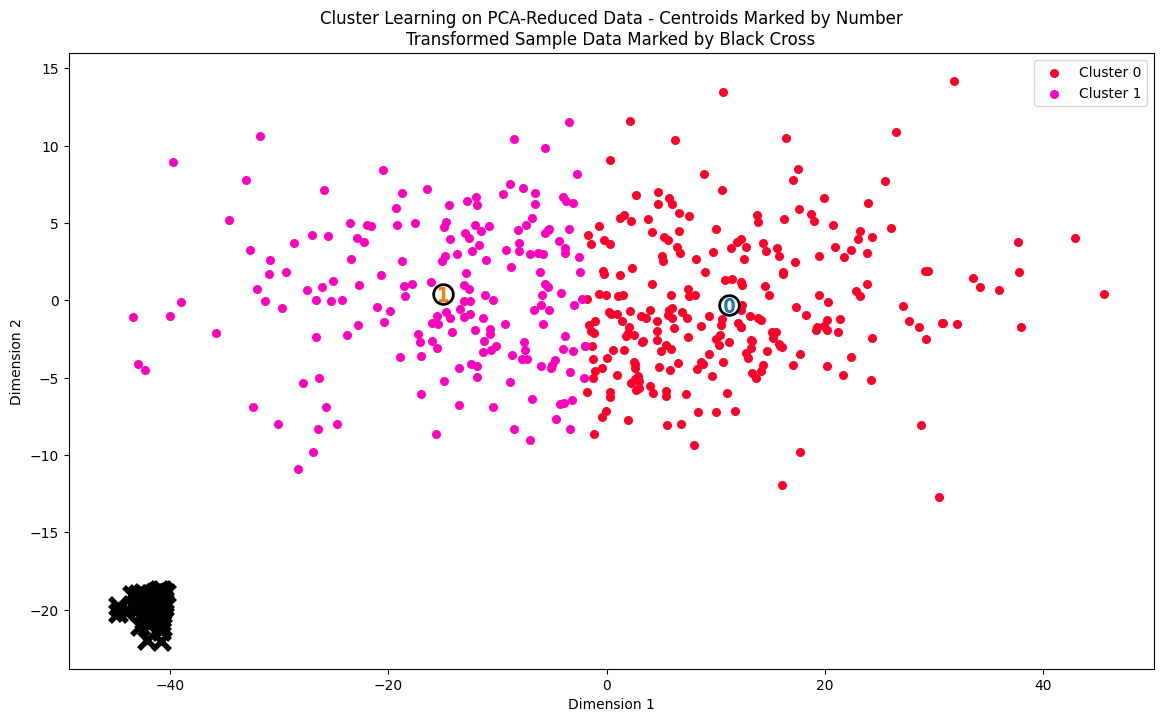

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers_pca, pca_samples)

In [32]:
centers_pca.shape

(2, 2)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [33]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers_pca)
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers_pca))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2.028274e+24,41881.0,2888391.0,64263.0,3177.0,1796237.0
Segment 1,8.945611e+12,63336.0,9299628.0,14675.0,10095.0,667110.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [34]:
# Display the predictions
for i, pred in enumerate(preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0
Sample point 5 predicted to be in Cluster 0
Sample point 6 predicted to be in Cluster 0
Sample point 7 predicted to be in Cluster 0
Sample point 8 predicted to be in Cluster 1
Sample point 9 predicted to be in Cluster 1
Sample point 10 predicted to be in Cluster 1
Sample point 11 predicted to be in Cluster 0
Sample point 12 predicted to be in Cluster 0
Sample point 13 predicted to be in Cluster 0
Sample point 14 predicted to be in Cluster 0
Sample point 15 predicted to be in Cluster 0
Sample point 16 predicted to be in Cluster 1
Sample point 17 predicted to be in Cluster 1
Sample point 18 predicted to be in Cluster 0
Sample point 19 predicted to be in Cluster 0
Sample point 20 predicted to be in Cluster 0
Sample point 21 predicted to be in Cluster 1
Sample point 22 pred

**Answer:**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

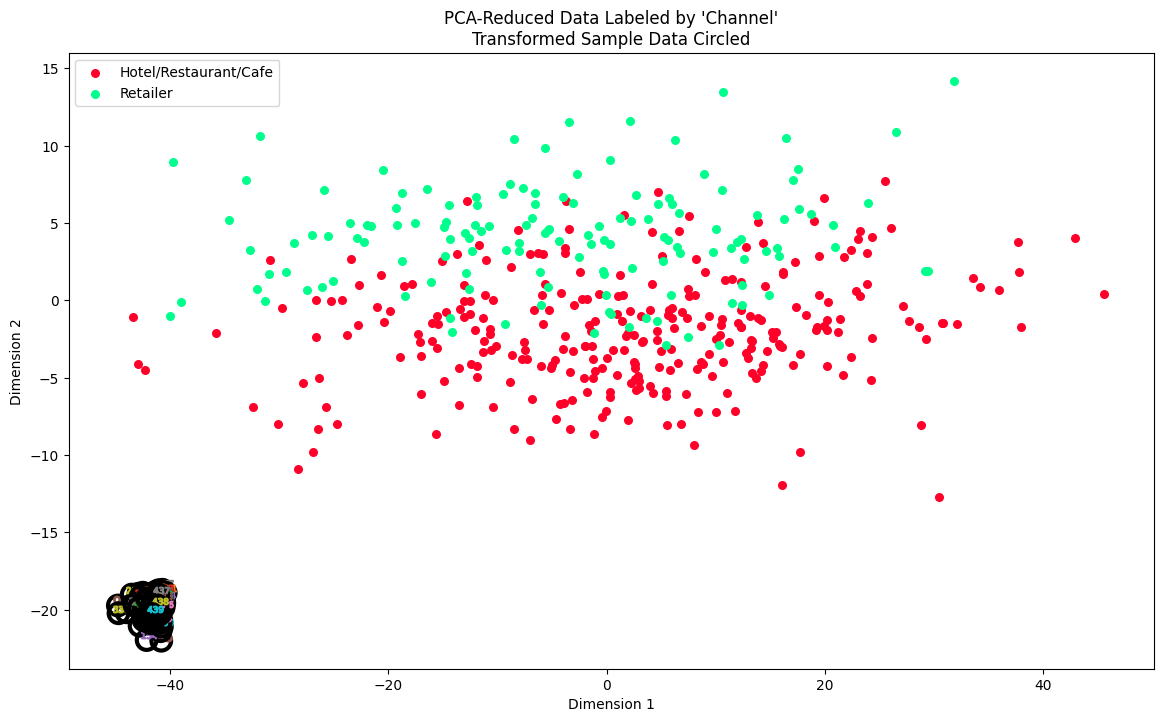

In [35]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.